# Aula 03 - Exercício 02
## Aproximação de funções (Regressão)


**Antonio Moreira** - 9779242

Para esse exercício, carregue a base de dados `teste1.txt`. Os dados possuem 14 variáveis, organizados em 14 colunas. A 15ª coluna representa o valor da função. Os dados estão separados pelo caractere `\t`.


Note que os dados não podem ser lidos linha a linha, pois existem linhas que foram quebradas antes das 14 variáveis serem descritas.

* Leia os dados e armazene-os em uma tabela.
  * Dica: Converta sua tabela em uma estrutura do tipo pandas.DataFrame





In [1]:
import pandas as pd
import numpy as np

%matplotlib inline

fp = open("./datasets/test1.txt")

# OBS: exclui do arquivo original as tres primeiras linhas relativas
#      às classes, o comentário e o '\n'

X = []
boolean = False

for i in fp:
    aux = i.split()
    
    if(len(aux) == 15):
        j = list(map(float, i.split()))
        X.append(j)
    elif(boolean):
        l = list(map(float, i.split()))
        k = np.append(k,[l])
        X.append(k)
        k = []
        boolean = False
    else:
        k = list(map(float, i.split()))
        boolean = True
        
fp.close()

X = np.array(X)

#print(np.shape(X))
dataset = pd.DataFrame(X, columns = ["VL", "VM", "VP", "M", "VMVL", "VMVM", "VMVP", "VMM", "T", "H", "Vv", "DirV", "MHE", "MLR", "CO"])
#print(dataset)
dataset.head()

,VL,VM,VP,M,VMVL,VMVM,VMVP,VMM,T,H,Vv,DirV,MHE,MLR,CO
0,1849.0,209.0,62.0,245.0,11.75,13.43,7.83,15.67,32.5,48.0,1.15,115.0,4.01,30.18,7.1
1,580.0,48.0,88.0,137.0,8.60,8.60,7.20,10.70,29.9,42.0,1.40,20.0,17.69,13.70,5.9
2,1438.0,207.0,108.0,386.0,11.80,9.40,8.60,13.40,37.1,28.0,0.60,170.0,3.49,38.37,9.6
3,651.0,58.0,23.0,46.0,9.60,13.70,13.70,12.00,15.7,64.0,0.00,159.0,5.33,32.97,7.4
4,623.0,55.0,82.0,141.0,5.10,4.50,6.60,7.80,27.4,46.0,0.70,27.0,17.69,13.70,3.7




---

*   Calcule a matriz de correlação dos dados e escolha a variável mais relevante.
  
* Dica 1: Se os dados estiverem em formato de DataFrame da biblioteca pandas, basta fazer dataset.corr() para gerar a matriz de correlação. Para facilitar ainda mais a visualização, você pode utilizar a função heatmap da biblioteca seaborn, passando o parâmetro a matriz de correlação calculada e `annot=True` para exibir os valores no heatmap.
* Dica 2: Se o heatmap estiver muito pequeno, é possível alterar o tamanho padrão das figuras do matplotlib, através do comando `plt.rcParams['figure.figsize'] = [w, h]`, onde` [w, h]` é a largura/altura da imagem respectivamente (um tamanho bom para leitura é 10 e 5)

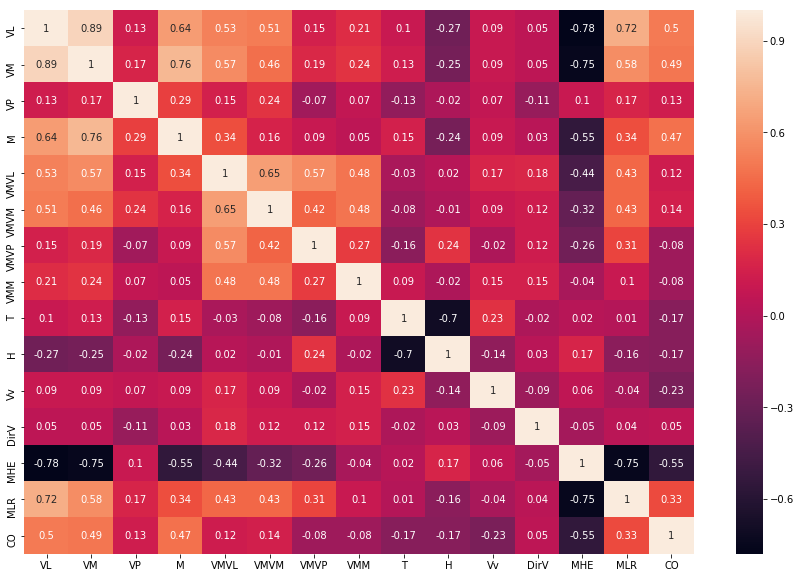

In [2]:
import seaborn as sb
import matplotlib.pyplot as plt

%matplotlib inline

#plt.rcParams['figure.figsize'] = [15, 10]
fig = plt.figure(figsize=(15,10))
sb.heatmap(dataset.corr().round(2), annot=True)
#sb.pairplot(dataset)
plt.show()
  
# Tomarei como 'variável mais relevante' a variável com maior correlação (em módulo) com a variável de predição
# desta forma, a variável com maior valor é a MHE = |-0.55| = 0.55



---



*   Com base na variável escolhida via matriz de correlação, aproxime a função por uma reta e calcule seu erro quadrático médio

* Dica 1: Utilize os pacotes importados para realizar a aproximação por função linear e para calcular o erro quadrático médio. 
* Dica 2: Para criar um novo conjunto com as variáveis selecionadas,  inicialize um `DataFrame()` do pandas passando como parâmetro as colunas do DataFrame original concatenadas com a função `_c` da biblioteca numpy: 

```python
pandas.DataFrame(numpy.c_[dataSet['Variavel 1'], dataSet['Variavel 2']], columns = ['Variavel 1', 'Variavel 2'])
```





In [8]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

dataTrain = pd.DataFrame(dataset['MHE'], columns=['MHE'])

# inicializando o regressor
regressor = LinearRegression()

regressor.fit(dataTrain, dataset['CO'])
regressor_pred = regressor.predict(dataTrain)

print("Reta encontrada: y = %f*x + %f" % (regressor.coef_, regressor.intercept_))

print("Mean squared error: %.2f" % mean_squared_error(dataset['CO'], regressor_pred))

Reta encontrada: y = -0.229653*x + 8.837847
Mean squared error: 5.97




---



*  Agora calcule uma aproximação por uma função quadrática. Verifique qual produz o menor erro quadrático médio: a aproximação via função linear ou via função quadrática

  * Dica: Utilize a biblioteca já importada para *transformar* os dados para uma regressão polinomial (func. quadrática). Mais informações sobre como o processo podem ser encontradas dentro da pasta do projeto.



In [70]:
from sklearn.preprocessing import PolynomialFeatures

p = PolynomialFeatures(degree=2)
X_Transf = p.fit_transform(dataTrain)

#print(X_Transf)

regressor.fit(X_Transf, dataset['CO'])

print(regressor.coef_)
print(regressor.intercept_)

regressor_pred = regressor.predict(X_Transf)

#print(regressor_2_pred)

print("Mean squared error: %.2f" % mean_squared_error(dataset['CO'], regressor_pred))

[ 0.         -0.73336614  0.0209284 ]
10.81158866674577
Mean squared error: 5.70


A diferença entre o **erro quadrátrico médio** encontrado entre os dados aproximados por uma função quadrátrica e a linear é de .27, demonstrado que este segundo preditor obteve melhores resultados.



---

*   Por fim, calcule uma aproximação por uma função cúbica. Verifique qual produz o menor erro quadrático médio: a aproximação via função linear, via função quadrática ou via função cúbica.


In [73]:
p = PolynomialFeatures(degree=3)
X_Transf = p.fit_transform(dataTrain)

#print(X_Transf)

regressor.fit(X_Transf, dataset['CO'])

print(regressor_3.coef_)
print(regressor_3.intercept_)

regressor_3_pred = regressor_3.predict(X_Transf)

#print(regressor_3_pred)

print("Mean squared error: %.2f" % mean_squared_error(dataset['CO'], regressor_3_pred))

[ 0.          0.34350494 -0.0726403   0.00236456]
7.681542224413058
Mean squared error: 5.60


A aproximação cúbica obteve um erro inferior às outras duas anteriores. Com uma diferença no erro quadrático médio de **.37** em relação à reta e **0.1** em relação a função do segundo grau.